<a href="https://colab.research.google.com/github/SajalSinha/Bike_sharing_demand/blob/main/CP_2_Team_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/VinayVirraj/Bike-sharing-demand/main/SeoulBikeData.csv',encoding = 'unicode_escape',date_parser='Date')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
print('The DataFrame contains {} lines and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame contains 8760 lines and 14 columns


In [7]:
# checking for the data types and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#cheking for null values 
df.isnull().mean()*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [9]:
df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,06/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
#Since 99% of rented bike count is 2526 but the max value is 3556, we need to make sure if values in that range or that exact value is an outlier or not.

In [11]:
df[df['Rented Bike Count']>2500]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,25/04/2018,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,26/04/2018,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,27/04/2018,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,30/04/2018,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
df[df['Rented Bike Count']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [13]:
# sns.pairplot(df,hue="Rented Bike Count")

In [14]:
df['Date']=pd.to_datetime(df['Date'])
# Extracting year, day , month and weekdays from the date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df["Month"]=df["Date"].dt.month_name()
df['weekday']=df["Date"].dt.day_name()

In [15]:
df['weekday'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [16]:
# df['weekday'] = df['weekday'] +1
# df['weekday'].unique()

In [17]:
(df['Solar Radiation (MJ/m2)'].value_counts()/ len(df['Solar Radiation (MJ/m2)']))*100

0.00    49.086758
0.01     1.461187
0.02     0.936073
0.03     0.787671
0.06     0.696347
          ...    
3.44     0.011416
3.35     0.011416
3.38     0.011416
2.97     0.011416
2.69     0.011416
Name: Solar Radiation (MJ/m2), Length: 345, dtype: float64

In [18]:
df.drop('Solar Radiation (MJ/m2)', axis = 1, inplace = True)

In [19]:
df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))
df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

#EDA

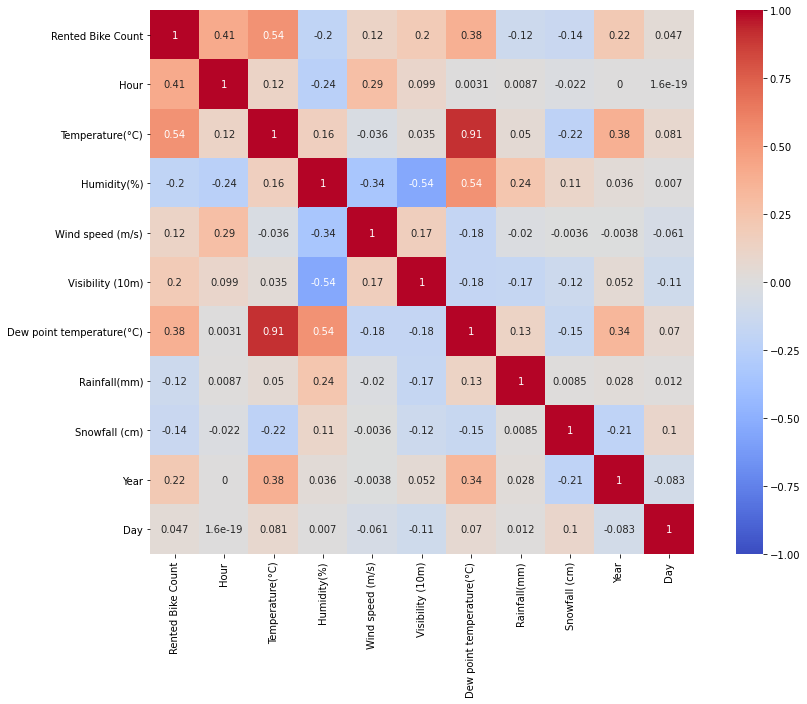

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [21]:
# dropping Dew point temperature column from the dataset
df.drop('Dew point temperature(°C)', axis = 1, inplace = True)

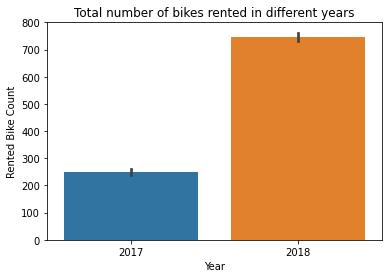

In [22]:
sns.barplot(x = 'Year', y = 'Rented Bike Count', data = df)
plt.title("Total number of bikes rented in different years")
plt.show()

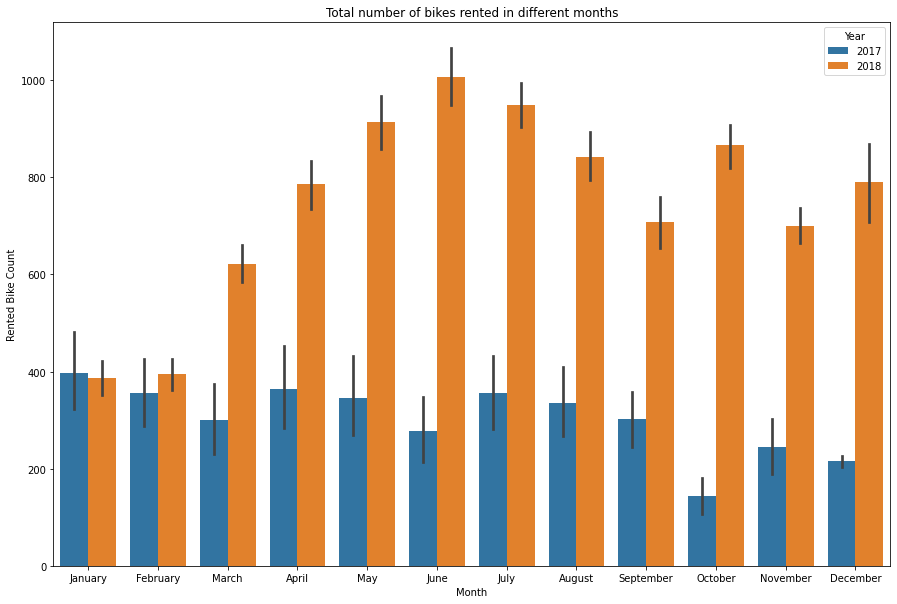

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data = df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()

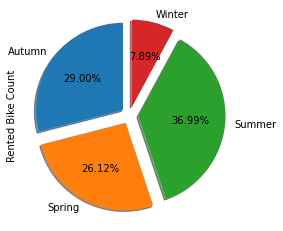

In [24]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')

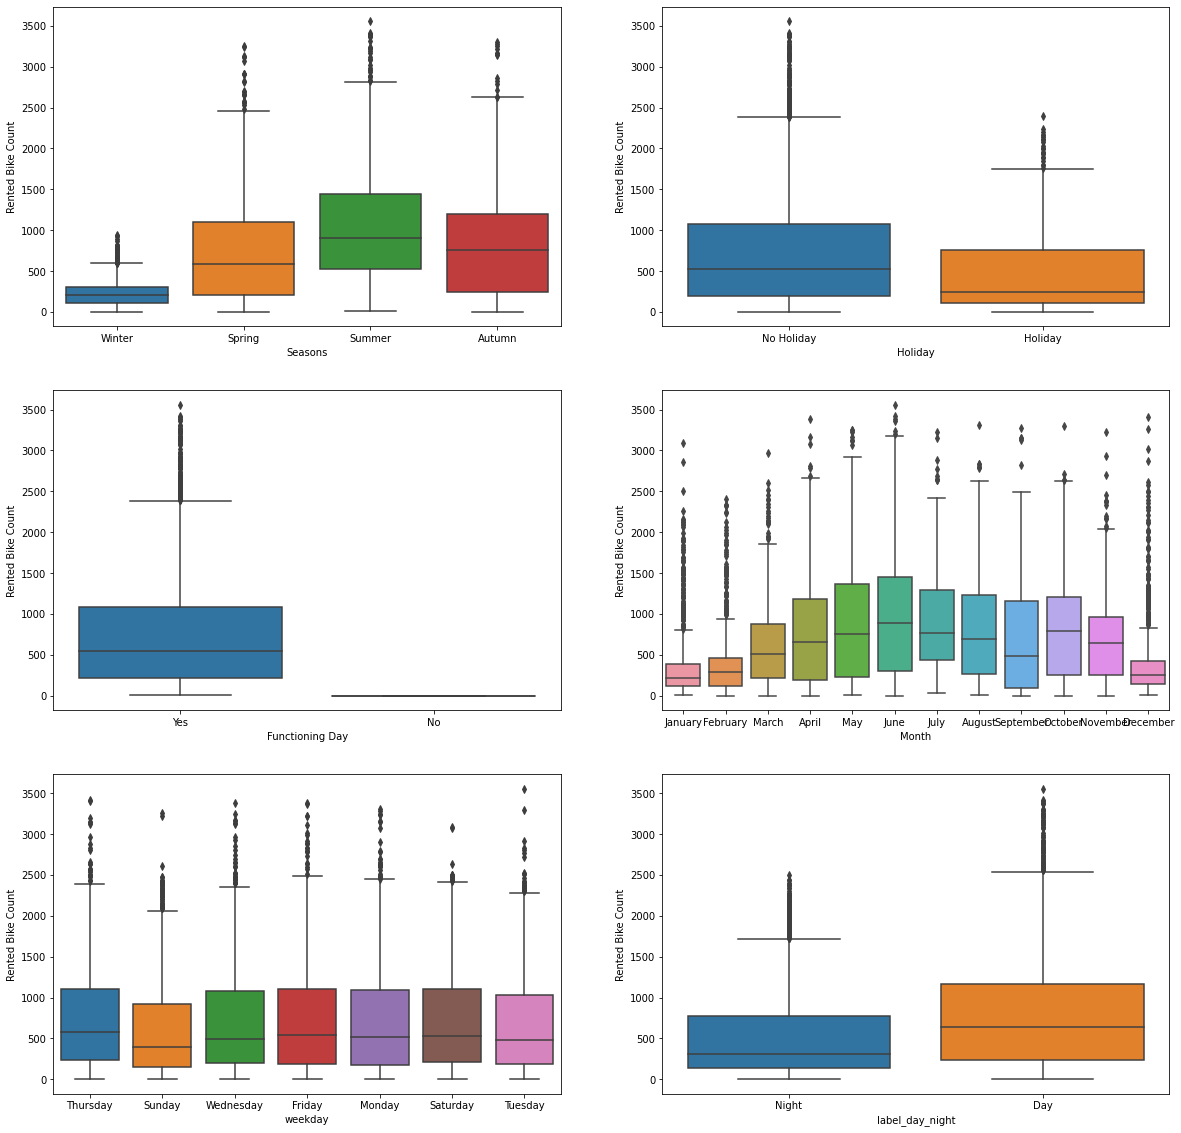

In [25]:
# visualizing categorical variable
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'label_day_night', y = 'Rented Bike Count', data = df)

In [26]:
for i in df.describe().columns:
  if i not in ['Rented Bike Count','Year','Day','Month','weekday','Hour']:
    display(px.scatter(df,i,'Rented Bike Count',trendline="ols",trendline_color_override='yellow',opacity=0.6,title=f"{i} and Rented Bike Count"),width=500,length=500)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



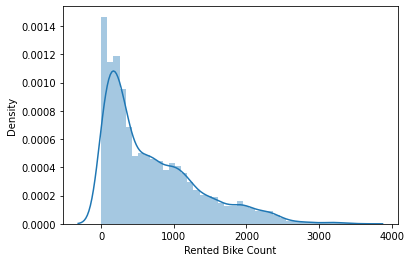

In [27]:
sns.distplot(df['Rented Bike Count'])

In [28]:
x = df['Rented Bike Count']
x.skew()

1.1534281773679014

In [29]:
x = np.log(df['Rented Bike Count'])
x.skew()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



nan

In [30]:
a = (np.sqrt(df['Rented Bike Count']))
a.skew()

0.237362090985412

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



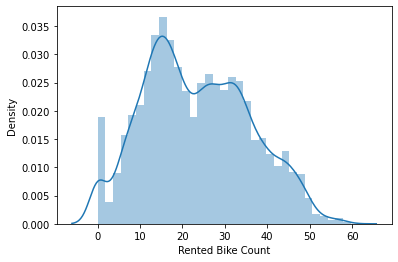

In [31]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [32]:
# sns.pairplot(df,hue="Rented Bike Count")

#Model Preparation

In [33]:
bike_df = df.copy()

In [34]:
df1Corr=pd.DataFrame(bike_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation value to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation value to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Year,0.215162
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Day,0.046849
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [35]:
# Create dummy variables for the catgeorical variable State
status = pd.get_dummies(bike_df['Seasons'], drop_first=True)
status1 = pd.get_dummies(bike_df['Holiday'], drop_first=True)
status2 = pd.get_dummies(bike_df['Functioning Day'], drop_first=True)
status3 = pd.get_dummies(bike_df['weekday'], drop_first=True)
status4 = pd.get_dummies(bike_df['Month'], drop_first=True)
status5 = pd.get_dummies(bike_df['label_day_night'], drop_first=True)

In [36]:
bike_df=pd.concat([bike_df,status,status1, status2, status3, status4, status5], axis =1)

In [37]:
# Drop the original column State from the dataframe
bike_df.drop(["Holiday","Seasons","Functioning Day","weekday","Month","label_day_night","Day","Year"], axis=1, inplace=True)

In [38]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [39]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented Bike Count  8760 non-null   int64         
 2   Hour               8760 non-null   int64         
 3   Temperature(°C)    8760 non-null   float64       
 4   Humidity(%)        8760 non-null   int64         
 5   Wind speed (m/s)   8760 non-null   float64       
 6   Visibility (10m)   8760 non-null   int64         
 7   Rainfall(mm)       8760 non-null   float64       
 8   Snowfall (cm)      8760 non-null   float64       
 9   Spring             8760 non-null   uint8         
 10  Summer             8760 non-null   uint8         
 11  Winter             8760 non-null   uint8         
 12  No Holiday         8760 non-null   uint8         
 13  Yes                8760 non-null   uint8         
 14  Monday  

In [40]:
dependent_variable = 'Rented Bike Count'

In [41]:
# Create a list of independent variables
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})
(independent_variables)

['Thursday',
 'Temperature(°C)',
 'Winter',
 'Hour',
 'May',
 'December',
 'Tuesday',
 'June',
 'Visibility (10m)',
 'November',
 'Summer',
 'February',
 'Wind speed (m/s)',
 'Humidity(%)',
 'Wednesday',
 'Sunday',
 'Snowfall (cm)',
 'January',
 'Yes',
 'Spring',
 'March',
 'Date',
 'August',
 'July',
 'September',
 'Night',
 'Monday',
 'No Holiday',
 'October',
 'Saturday',
 'Rainfall(mm)']

In [42]:
# Create the data of independent variables
X = bike_df[independent_variables].values

In [43]:
# Create the dependent variable data
y = np.sqrt(bike_df[dependent_variable].values)

In [44]:
bike_df[independent_variables]

,Thursday,Temperature(°C),Winter,Hour,May,December,Tuesday,June,Visibility (10m),November,Summer,February,Wind speed (m/s),Humidity(%),Wednesday,Sunday,Snowfall (cm),January,Yes,Spring,March,Date,August,July,September,Night,Monday,No Holiday,October,Saturday,Rainfall(mm)
0,1,-5.2,1,0,0,0,0,0,2000,0,0,0,2.2,37,0,0,0.0,1,1,0,0,2017-01-12,0,0,0,1,0,1,0,0,0.0
1,1,-5.5,1,1,0,0,0,0,2000,0,0,0,0.8,38,0,0,0.0,1,1,0,0,2017-01-12,0,0,0,1,0,1,0,0,0.0
2,1,-6.0,1,2,0,0,0,0,2000,0,0,0,1.0,39,0,0,0.0,1,1,0,0,2017-01-12,0,0,0,1,0,1,0,0,0.0
3,1,-6.2,1,3,0,0,0,0,2000,0,0,0,0.9,40,0,0,0.0,1,1,0,0,2017-01-12,0,0,0,1,0,1,0,0,0.0
4,1,-6.0,1,4,0,0,0,0,2000,0,0,0,2.3,36,0,0,0.0,1,1,0,0,2017-01-12,0,0,0,1,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,4.2,0,19,0,0,0,0,1894,1,0,0,2.6,34,0,0,0.0,0,1,0,0,2018-11-30,0,0,0,0,0,1,0,0,0.0
8756,0,3.4,0,20,0,0,0,0,2000,1,0,0,2.3,37,0,0,0.0,0,1,0,0,2018-11-30,0,0,0,0,0,1,0,0,0.0
8757,0,2.6,0,21,0,0,0,0,1968,1,0,0,0.3,39,0,0,0.0,0,1,0,0,2018-11-30,0,0,0,1,0,1,0,0,0.0
8758,0,2.1,0,22,0,0,0,0,1859,1,0,0,1.0,41,0,0,0.0,0,1,0,0,2018-11-30,0,0,0,1,0,1,0,0,0.0


In [45]:
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
bike_df_train.size

196224

In [47]:
bike_df_test.size

84096

#Rescaling

In [48]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]
scaler = MinMaxScaler()
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
5584,2018-07-21,0.248313,0.695652,0.955986,0.306122,0.378378,0.876330,0.0,0.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5308,2018-10-07,0.037402,0.173913,0.670775,0.989796,0.067568,0.994425,0.0,0.0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5446,2018-07-15,0.451912,0.956522,0.792254,0.785714,0.121622,0.887481,0.0,0.0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7554,2018-11-10,0.668729,0.782609,0.521127,0.408163,0.324324,0.926001,0.0,0.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3290,2018-04-17,0.066648,0.086957,0.455986,0.459184,0.121622,0.993411,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# RFE

In [49]:
y_train = bike_df_train.pop('Rented Bike Count')
X_train = bike_df_train.drop('Date', axis=1)

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)             
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Hour', True, 1),
 ('Temperature(°C)', True, 1),
 ('Humidity(%)', True, 1),
 ('Wind speed (m/s)', False, 17),
 ('Visibility (10m)', False, 2),
 ('Rainfall(mm)', True, 1),
 ('Snowfall (cm)', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('No Holiday', True, 1),
 ('Yes', True, 1),
 ('Monday', False, 19),
 ('Saturday', False, 13),
 ('Sunday', False, 5),
 ('Thursday', False, 15),
 ('Tuesday', False, 12),
 ('Wednesday', False, 16),
 ('August', False, 8),
 ('December', False, 18),
 ('February', False, 6),
 ('January', False, 14),
 ('July', False, 9),
 ('June', True, 1),
 ('March', False, 7),
 ('May', True, 1),
 ('November', False, 11),
 ('October', False, 3),
 ('September', False, 10),
 ('Night', False, 4)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Spring', 'Summer', 'Winter', 'No Holiday', 'Yes',
       'June', 'May'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['Wind speed (m/s)', 'Visibility (10m)', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'December', 'February',
       'January', 'July', 'March', 'November', 'October', 'September',
       'Night'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     627.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:13   Log-Likelihood:                 4274.4
No. Observations:                6132   AIC:                            -8523.
Df Residuals:                    6119   BIC:                            -8435.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2173      0.016    -

In [59]:
X_train_new = X_train_rfe.drop(['Rainfall(mm)'], axis=1)

In [60]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     654.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:13   Log-Likelihood:                 4198.9
No. Observations:                6132   AIC:                            -8374.
Df Residuals:                    6120   BIC:                            -8293.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2038      0.016    -

In [61]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Yes,23.09
1,Temperature(°C),20.71
7,No Holiday,16.98
2,Humidity(%),9.32
0,Hour,4.16
5,Summer,3.16
6,Winter,3.15
4,Spring,2.26
10,May,1.25
9,June,1.23


In [63]:
X_train_new = X_train_new.drop(["Yes"],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     556.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:13   Log-Likelihood:                 3798.2
No. Observations:                6132   AIC:                            -7574.
Df Residuals:                    6121   BIC:                            -7500.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0573      0.014     

In [64]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature(°C),17.76
7,No Holiday,14.58
2,Humidity(%),8.65
0,Hour,4.13
5,Summer,3.16
6,Winter,2.32
4,Spring,2.12
9,May,1.25
8,June,1.23
3,Snowfall (cm),1.13


In [65]:
X_train_new = X_train_new.drop(['Temperature(°C)'], axis=1)

In [66]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     547.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:14   Log-Likelihood:                 3624.8
No. Observations:                6132   AIC:                            -7230.
Df Residuals:                    6122   BIC:                            -7162.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2417      0.011     22.682

In [67]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,No Holiday,10.83
1,Humidity(%),7.59
0,Hour,3.37
4,Summer,2.18
3,Spring,2.12
5,Winter,1.84
8,May,1.23
7,June,1.22
2,Snowfall (cm),1.12


In [68]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     547.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:14   Log-Likelihood:                 3624.8
No. Observations:                6132   AIC:                            -7230.
Df Residuals:                    6122   BIC:                            -7162.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2417      0.011     22.682

In [69]:
y_train_cnt = lm.predict(X_train_lm)

In [70]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [71]:
y_test = bike_df_test.pop('Rented Bike Count')
X_test = bike_df_test

In [72]:
# using model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
y_pred = lm.predict(X_test_new)

In [80]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-square:',round(100*(r2_score(y_test,y_pred))))

MAE: 0.10226959662134852
MSE: 0.018590287145430803
RMSE: 0.13634620326738403
R-square: 45


Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

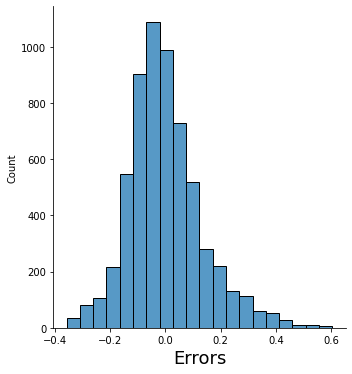

In [ ]:
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
def score(y_pred, y_true):
  '''
  Evaluates The Model With RMLSE
  '''
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score

In [ ]:
score(y_test,y_pred)

#Decission Tree Regressor Model

##Model Preparation

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night


In [ ]:
# Create dummy variables for the catgeorical variable State
Status = pd.get_dummies(df['Seasons'], drop_first=True)
Status1 = pd.get_dummies(df['Holiday'], drop_first=True)
Status2 = pd.get_dummies(df['Functioning Day'], drop_first=True)
Status3 = pd.get_dummies(df['weekday'], drop_first=True)
Status4 = pd.get_dummies(df['Month'], drop_first=True)
Status5 = pd.get_dummies(df['label_day_night'], drop_first=True)

In [ ]:
df=pd.concat([df,Status,Status1, Status2, Status3, Status4, Status5], axis =1)

In [ ]:
# Drop the original column State from the dataframe
df.drop(["Holiday","Seasons","Functioning Day", "weekday","Month", "label_day_night","Day","Year",'Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


##Splitting of Data

In [ ]:
x = df.drop('Rented Bike Count',axis=1)
y = np.sqrt(df['Rented Bike Count'])
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
0,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
a_train, a_test, b_train, b_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(a_train.shape)
print(b_train.shape)
print(a_test.shape)
print(b_test.shape)

(7008, 30)
(7008,)
(1752, 30)
(1752,)


##Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as met
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(a_train,b_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(b_train,DT_reg.predict(a_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(b_test,DT_reg.predict(a_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(b_test,DT_reg.predict(a_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(b_test,DT_reg.predict(a_test))}")


R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.843365662551225
Mean absolute error on test dataset when min leaf 1: 3.2252669079726832
Mean squared error on test dataset when min leaf 1: 24.667755550275146

R-sqared on train dataset when min leaf 2 : 0.9855772073094543
R-sqared on test dataset when min leaf 2: 0.8548336239385461
Mean absolute error on test dataset when min leaf 2: 3.1064464523353448
Mean squared error on test dataset when min leaf 2: 22.861709233930597

R-sqared on train dataset when min leaf 3 : 0.9711330707461239
R-sqared on test dataset when min leaf 3: 0.8689330606699862
Mean absolute error on test dataset when min leaf 3: 3.0163726538997953
Mean squared error on test dataset when min leaf 3: 20.641241714786016

R-sqared on train dataset when min leaf 4 : 0.9598572713352763
R-sqared on test dataset when min leaf 4: 0.8673628288551943
Mean absolute error on test dataset when min leaf 4: 3.025161156744398
Mean squared err

In [ ]:
DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=6)
DT_reg.fit(a_train,b_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(b_test,DT_reg.predict(a_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((b_test),DT_reg.predict(a_test)))*((a_test.shape[0]-1)/(a_test.shape[0]-a_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(b_test,DT_reg.predict(a_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(b_test,DT_reg.predict(a_test))}")

r-square score on test data :0.8627875530521529
adjusted r-square score on test data :0.8603957033087274
homogeneity score on test data :0.8536419828090458
mean squared error score on test data :21.609074707974006


In [ ]:
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

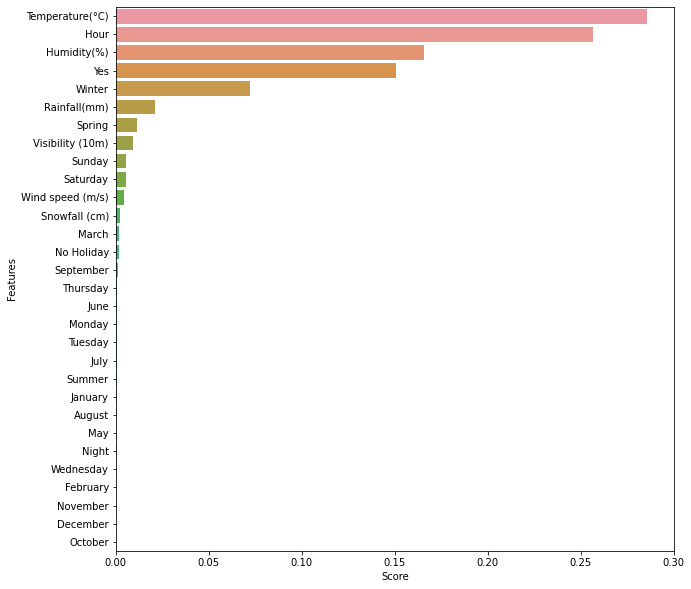

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=features['Score'],y=features['Features'])
plt.show()

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [ ]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(a_train,b_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...ange=None,
                  

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,min_samples_leaf= 40,min_samples_split = 50,n_estimators = 120)
gb_boost_with_best_perams.fit(a_train,b_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Gredient boost score on train data
gb_boost_with_best_perams.score(a_train,b_train)

0.9539400456545698

In [ ]:
#Gredient boost score on test data
gb_boost_with_best_perams.score(a_test,b_test)

0.9190353708501229

In [ ]:
# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(b_test,gb_boost_with_best_perams.predict(a_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((b_test),gb_boost_with_best_perams.predict(a_test)))*((a_test.shape[0]-1)/(a_test.shape[0]-a_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(b_test,gb_boost_with_best_perams.predict(a_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(b_test,gb_boost_with_best_perams.predict(a_test))}")

r-square score on test data :0.9190353708501229
adjusted r-square score on test data :0.9176240176400727
homogeneity score on test data :0.9999999999999999
mean squared error score on test data :12.750816408573327


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



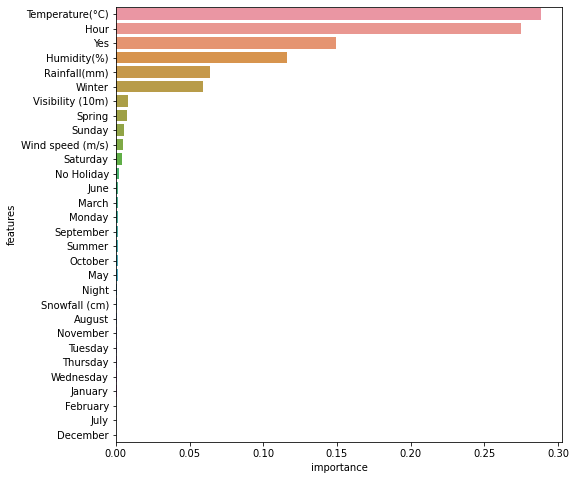

In [ ]:
plt.figure(figsize=(8,8))
features_importance_gb = pd.DataFrame({'features':a_train.columns,'importance' : gb_boost_with_best_perams.feature_importances_})
features_importance_gb.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(features_importance_gb['importance'],features_importance_gb['features'])